<a href="https://colab.research.google.com/github/TrushaT/Data-Science-/blob/main/DS_Exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Trusha Talati  
UID: 2018130054

## Exp 1 A 

### Step 1. Load the dataset

In [161]:
#importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
from google.colab import drive #mounting google drive which contains the dataset 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
%cd /content/drive/MyDrive/DS

/content/drive/MyDrive/DS


In [164]:
%pwd # checking the present directory which contains the dataset

'/content/drive/MyDrive/DS'

In [165]:
import pandas as pd  #importing pandas 
df = pd.read_csv('horse.csv', encoding='cp1252', delimiter=',', quotechar='"') # reading the csv file 

In [166]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

We can see that some columns have null values which need to be handled

In [168]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (299, 28)


The dataset has 299 rows and 28 columns

In [169]:
df.dtypes.value_counts()

object     17
float64     7
int64       4
dtype: int64

17 - categorical columns and 11 - numeric

In [170]:
# Finding percentage of null values for each column
nan_per = df.isna().sum()/len(df)*100
nan_per

surgery                   0.000000
age                       0.000000
hospital_number           0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64

Columns like nasogastric_reflux_ph, abdomo_appearance, abdomo_protein have more than 50% null values 

#### Categorical and Numeric feature divison 

In [171]:
obj_columns = []
nonobj_columns = []
for col in df.columns.values:
    if df[col].dtype=='object':
        obj_columns.append(col)
    else:
        nonobj_columns.append(col)

print(f"{len(obj_columns)} Object(Categorical) Columns are \n",obj_columns,'\n')
print(f"{len(nonobj_columns)} Non-object(Numeric) columns are \n",nonobj_columns)

df_obj = df[obj_columns] # categorical columns 
df_nonobj = df[nonobj_columns] #numeric columns 

17 Object(Categorical) Columns are 
 ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome', 'surgical_lesion', 'cp_data'] 

11 Non-object(Numeric) columns are 
 ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


### Step 2 - Data Preprocessing

Handling missing values - if null value percentage more than 50% -->removing those columns  
numerical columns --> missing values handled by replcaing with median  
categorical columns --> missing values handled by mode 


Numerical Data

In [172]:
for col in df_nonobj.columns.values: # Iterate through all numeric columns
    if (pd.isna(df_nonobj[col]).sum())>0: # If column has null values
        if pd.isna(df_nonobj[col]).sum()>(0.5*len(df_nonobj)): # Remove column if it has more than 50% null values
            print(col,"has been removed")
            df_nonobj = df_nonobj.drop([col], axis=1)
            df = df.drop([col], axis=1)

        else:
            df[col] = df[col].fillna(df[col].median()) # Else, fill the null values with the median of the non-null values
            df_nonobj[col] = df_nonobj[col].fillna(df_nonobj[col].median()) 

nasogastric_reflux_ph has been removed
abdomo_protein has been removed


 For Categorical Data

In [173]:
for col in df_obj.columns.values: # Iterate through all categorical columns
    if (pd.isna(df_obj[col]).sum())>0: # If column has null values
        if pd.isna(df_obj[col]).sum()>(0.5*len(df_obj)): # Remove column if it has more than 50% null values
            print(col,"has been removed")
            df_obj = df_obj.drop([col], axis = 1)
            df = df.drop([col], axis=1)
        else:
            df[col] = df[col].fillna(df[col].mode()) # Else, fill the null values with the median of the non-null values
            df_obj[col] = df_obj[col].fillna(df_obj[col].mode())

abdomo_appearance has been removed


In [174]:
print("Shape of numerical data (samples, features): ",df_nonobj.shape)
print("Shape of categorical data (samples, features): ",df_obj.shape)
print("Shape of categorical data (samples, features): ",df.shape)

Shape of numerical data (samples, features):  (299, 9)
Shape of categorical data (samples, features):  (299, 16)
Shape of categorical data (samples, features):  (299, 25)


The dataset now has 299 rows and 25 columns out of which 16 are categorical

### Step 3 - Exploratory Data Analysis

In [175]:
df2 = df
df2['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

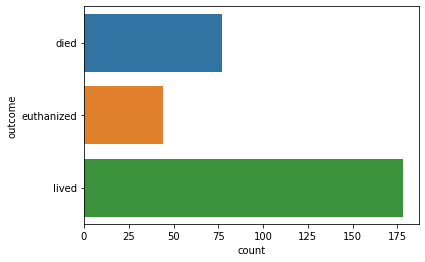

In [176]:
# count plot along y axis
sns.countplot(y ='outcome', data = df2)
plt.show()

In this dataset, we have more 'lived' outcomes than 'died' outcomes

To understand how other features influence the target variable - outcome, we need to find correlation. For that first we need to convert categorical data to numeric data 

In [177]:
for col in df_obj.columns.values:
    df_obj[col] = df_obj[col].astype('category').cat.codes # Encoding categorical columns
    
merged_df = pd.concat([df_nonobj,df_obj],axis=1) # Merging the two dataframes

target = merged_df['outcome']
print(target.value_counts())

2    178
0     77
1     44
Name: outcome, dtype: int64


In [178]:
merged_df.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,530101,38.5,66.0,28.0,45.0,8.4,11300,0,0,0,0,1,3,3,2,2,0,2,2,2,1,0,0,0,0
1,534817,39.2,88.0,20.0,50.0,85.0,2208,0,0,1,0,-1,-1,4,1,3,0,3,-1,-1,0,4,1,0,0
2,530334,38.3,40.0,24.0,33.0,6.7,0,0,0,0,0,2,2,5,1,3,2,1,-1,-1,3,3,2,0,1
3,5290409,39.1,164.0,84.0,48.0,7.2,2208,0,0,1,1,0,2,2,2,1,0,2,0,0,1,-1,0,1,1
4,530255,37.3,104.0,35.0,74.0,7.4,4300,0,0,0,0,-1,-1,2,2,-1,-1,-1,-1,-1,-1,-1,0,0,0


In [179]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   hospital_number        299 non-null    int64  
 1   rectal_temp            299 non-null    float64
 2   pulse                  299 non-null    float64
 3   respiratory_rate       299 non-null    float64
 4   packed_cell_volume     299 non-null    float64
 5   total_protein          299 non-null    float64
 6   lesion_1               299 non-null    int64  
 7   lesion_2               299 non-null    int64  
 8   lesion_3               299 non-null    int64  
 9   surgery                299 non-null    int8   
 10  age                    299 non-null    int8   
 11  temp_of_extremities    299 non-null    int8   
 12  peripheral_pulse       299 non-null    int8   
 13  mucous_membrane        299 non-null    int8   
 14  capillary_refill_time  299 non-null    int8   
 15  pain  

Correlation of target variable - outcome with other features 

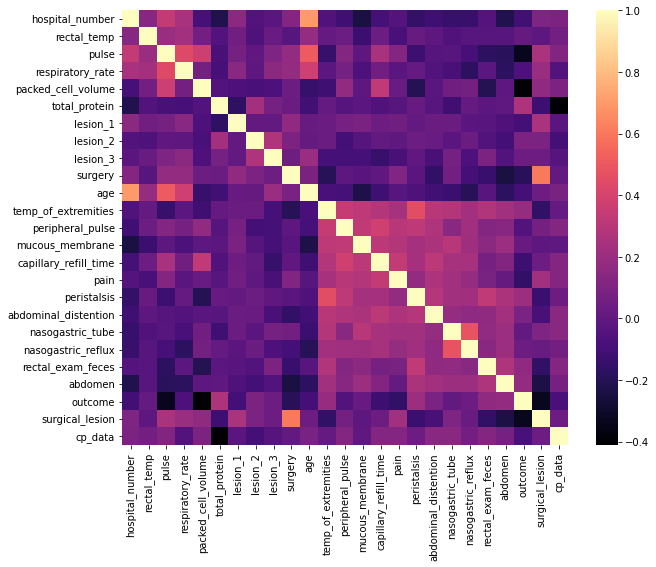

In [180]:
df_corr = merged_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,cmap='magma')

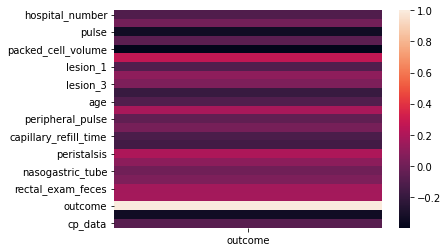

In [181]:
x = df_corr[['outcome']]
sns.heatmap(x)

In [182]:
df_corr['outcome'].sort_values(ascending=False)

outcome                  1.000000
total_protein            0.265889
peristalsis              0.201047
temp_of_extremities      0.185245
abdomen                  0.173353
rectal_exam_feces        0.165896
lesion_2                 0.098993
abdominal_distention     0.094556
nasogastric_reflux       0.044803
lesion_3                 0.044631
mucous_membrane          0.022311
rectal_temp              0.013273
nasogastric_tube         0.003411
peripheral_pulse        -0.049982
respiratory_rate        -0.068581
cp_data                 -0.078066
lesion_1                -0.100738
age                     -0.101782
hospital_number         -0.106396
capillary_refill_time   -0.121691
pain                    -0.152912
surgery                 -0.189222
surgical_lesion         -0.332933
pulse                   -0.335550
packed_cell_volume      -0.398371
Name: outcome, dtype: float64

Columns like total_protein,peristalsis,temp_of_extremities are highly positively correlated to target variable

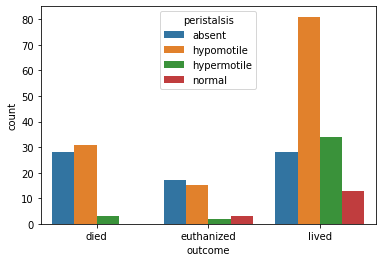

In [183]:
sns.countplot(data=df2, x='outcome', hue = 'peristalsis')

We can infer that if peristalsis if not normal, the horse is likely to die

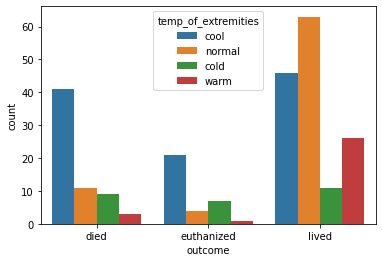

In [184]:
sns.countplot(data=df2, x='outcome', hue = 'temp_of_extremities')

Under warm and normal temperatures , horse is more likely to be lived 

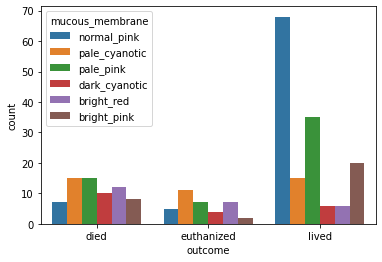

In [185]:
sns.countplot(data=df2, x='outcome', hue = 'mucous_membrane')

Since mucuous membrane is correlated by less than 10% to outcome, as shown by this countplot we can verify that age and outcome have no definite relationship 

 Removal of features having very less correlation (less than 10%)

In [186]:
print("Data Size Before Correlated Column Removal :",merged_df.shape)

df_corr_outcome = df_corr['outcome'].sort_values(ascending=False)
df_corr_outcome = abs(df_corr_outcome).sort_values(ascending=False)
for col in range(len(df_corr_outcome)):
        if abs(df_corr_outcome[col])<0.1:
            merged_df.drop([df_corr_outcome.index[col]], axis=1, inplace=True)
            print(df_corr_outcome.index[col],"removed")
print("Data Size After Correlated Column Removal :",merged_df.shape)

Data Size Before Correlated Column Removal : (299, 25)
lesion_2 removed
abdominal_distention removed
cp_data removed
respiratory_rate removed
peripheral_pulse removed
nasogastric_reflux removed
lesion_3 removed
mucous_membrane removed
rectal_temp removed
nasogastric_tube removed
Data Size After Correlated Column Removal : (299, 15)


### Step 4 - Data Partition 

In [187]:
from sklearn.model_selection import train_test_split
X = merged_df.drop('outcome',axis=1)
y = merged_df['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 20% Test split

In [188]:
X

,hospital_number,pulse,packed_cell_volume,total_protein,lesion_1,surgery,age,temp_of_extremities,capillary_refill_time,pain,peristalsis,rectal_exam_feces,abdomen,surgical_lesion
0,530101,66.0,45.0,8.4,11300,0,0,1,2,2,0,1,0,0
1,534817,88.0,50.0,85.0,2208,1,0,-1,1,3,0,0,4,0
2,530334,40.0,33.0,6.7,0,0,0,2,1,3,2,3,3,0
3,5290409,164.0,48.0,7.2,2208,1,1,0,2,1,0,1,-1,1
4,530255,104.0,74.0,7.4,4300,0,0,-1,2,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,533886,120.0,55.0,65.0,3205,1,0,0,2,1,0,-1,0,0
295,527702,72.0,44.0,7.5,2208,0,0,1,2,4,2,0,1,1
296,529386,72.0,60.0,6.8,3205,1,0,0,1,4,0,1,0,1
297,530612,100.0,50.0,6.0,2208,1,0,1,1,3,2,0,1,1


In [189]:
y

0      0
1      1
2      2
3      0
4      0
      ..
294    1
295    1
296    0
297    2
298    1
Name: outcome, Length: 299, dtype: int8

### Step 5 - Model Building

In [190]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

### Step 6 - Model Summarization 

In [191]:
from sklearn import metrics

# Model Summarization
print('Classification Report\n',classification_report(y_test, predictions))
print('Confusion Matrix\n',confusion_matrix(y_test, predictions))
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision Score:",metrics.precision_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score:",metrics.recall_score(y_test, predictions, 
                                           pos_label='positive',
                                           average='micro'))

Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00         7
           2       0.61      0.89      0.72        38

    accuracy                           0.57        60
   macro avg       0.20      0.30      0.24        60
weighted avg       0.38      0.57      0.46        60

Confusion Matrix
 [[ 0  0 15]
 [ 0  0  7]
 [ 4  0 34]]
Accuracy: 0.5666666666666667
Precision Score: 0.5666666666666667
Recall Score: 0.5666666666666667


Thus the accuracy obtained is 55% and upong model tuning it can be improved 

### Step 7 - Model Tuning 

In [192]:
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'] # Solver alogirthms used to solve logistic regression as an optimisation problem
penalty = ['l2'] # Regularization is a way to avoid overfitting by penalizing high-valued regression coefficients. It reduces parameters and shrinks (simplifies) the model. 
c_values = [100, 10, 1.0, 0.1, 0.01] # Parameter - Inverse of regularization strength and Smaller values have more regularization

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # Repeats Stratified K-Fold n times with different randomization in each repetition
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s\n" % (grid_result.best_score_, grid_result.best_params_)) # Showing the best result and saving the other results and printing them
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.623309 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

0.621860 (0.087102) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.575906 (0.036876) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.567572 (0.036837) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.574758 (0.060782) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.585870 (0.007609) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.623309 (0.085896) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.574517 (0.037352) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.568961 (0.036619) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.574758 (0.060782) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.585870 (0.007609) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.617693 (0.080991) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.574517 (0.037352) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.567572 (0.035231) with: {'C': 1.0, 'penal

In [193]:
grid_result

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [194]:
grid_result.best_estimator_

LogisticRegression(C=10, solver='newton-cg')

In [195]:
final_model = grid_result.best_estimator_

For the model newton-cg is the best solver and can help improve accuracy 

### Step 8 - Model Evaluation

In [196]:
pred = final_model.predict(X_test)
print('Classification Report\n',classification_report(y_test, pred))
print('Confusion Matrix\n',confusion_matrix(y_test, pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision Score:",metrics.precision_score(y_test, pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score:",metrics.recall_score(y_test, pred, 
                                           pos_label='positive',
                                           average='micro'))

Classification Report
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.50      0.29      0.36         7
           2       0.74      0.84      0.79        38

    accuracy                           0.70        60
   macro avg       0.62      0.55      0.58        60
weighted avg       0.68      0.70      0.69        60

Confusion Matrix
 [[ 8  0  7]
 [ 1  2  4]
 [ 4  2 32]]
Accuracy: 0.7
Precision Score: 0.7
Recall Score: 0.7


Text(0.5, 257.44, 'Predicted label')

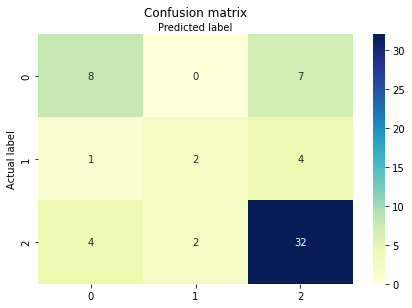

In [197]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [198]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return metrics.roc_auc_score(y_test, y_pred, average=average)
print('ROC AOC Score:',multiclass_roc_auc_score(y_test,pred))

ROC AOC Score: 0.6687176536729664


Conclusion: As the ROC AOC Score is above 0.5 but less than 0.7, we can say that the trained model is just about acceptable.

Thus using Repeats Stratified K-Fold n times we were able to improve the accuracy of our model by about 10%

## Exp 1 B

#### Importing the necessary libraries

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [268]:
df = pd.read_csv('auto-mpg.csv')

In [269]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [271]:
print("Shape of data (samples, features): ",df.shape)

Shape of data (samples, features):  (398, 9)


The dataset has 398 rows and 9 columns

In [272]:
df.dtypes.value_counts()

int64      4
float64    3
object     2
dtype: int64

2 columns are categorical and the rest 7 are numeric columns

### Handling missing values

  Before converting horsepower to numeric checking if all values of  horsepower are numbers 

In [273]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

'?' is one of the values of column horsepower and needs to be handled 

In [274]:
# Encoding '?' values as null values
df[df == '?'] = np.nan
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

Successfully replaced '?' with Nan

In [275]:
df.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
origin             1.0
dtype: float64

In [276]:
# converting the hp column from object / string type to float
df['horsepower'] = df['horsepower'].astype('float64') 

In [277]:
nan_per = df.isna().sum()/len(df)*100

In [278]:
nan_per

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64

Horsepower has Null values 

In [279]:
df['horsepower'].median()

93.5

In [280]:
for col in ['horsepower']:
    df[col].fillna(df[col].median(), inplace=True)

In [281]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

All null values have been handled

### Exploratory Data Analysis

Next task is to find correlation with target variables. First categorical columns need to be handled 

In [282]:
df = df.drop('car name', axis=1) # Car names do not contribute to mpg target feature

# Also replacing the categorical var with actual values
df['origin'] = df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america


Converting categorical columns to numeric using encoding

In [283]:
df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


Checking the correlation of features

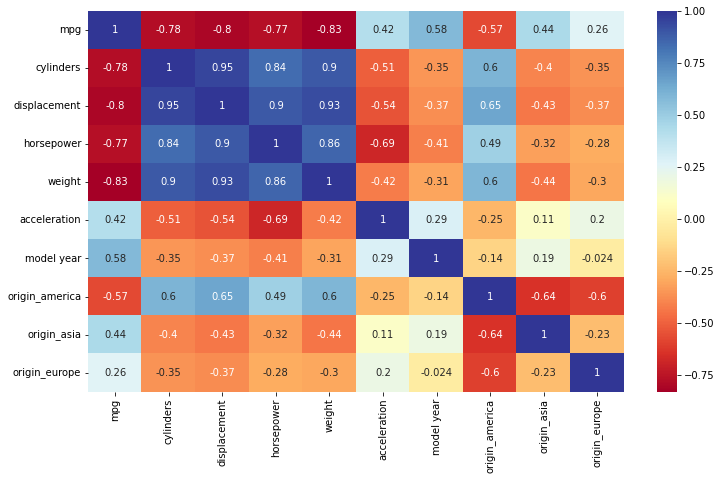

In [284]:
plt.rcParams['figure.figsize'] = [12,7]
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlBu');

In [286]:
df_corr = df.corr()
df_corr['mpg'].sort_values(ascending=False)

mpg               1.000000
model year        0.579267
origin_asia       0.442174
acceleration      0.420289
origin_europe     0.259022
origin_america   -0.568192
horsepower       -0.773453
cylinders        -0.775396
displacement     -0.804203
weight           -0.831741
Name: mpg, dtype: float64

Some highly related columns include weight,displacement,horsepower 

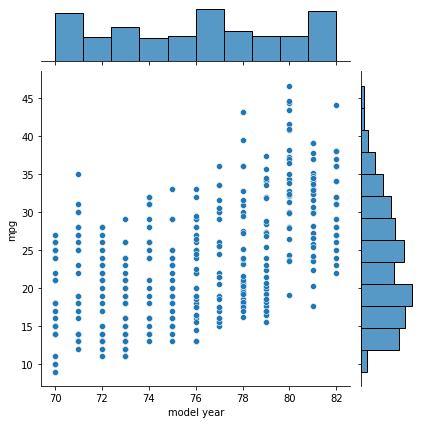

In [288]:
sns.jointplot(data=df,x='model year',y='mpg')

We can observe a positive correlation between mpg & model year with one increasing when the other does 

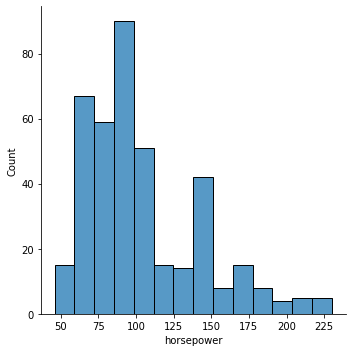

In [217]:
sns.displot(df['horsepower'])

The horsepower column values are a bit skewed to the lower side

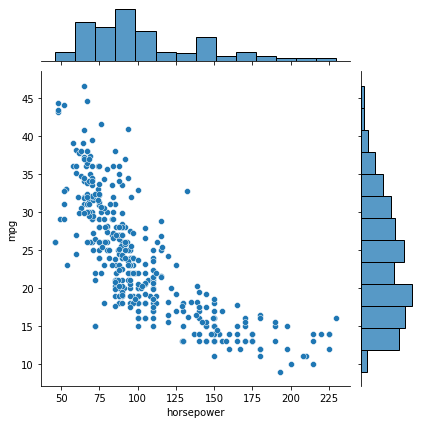

In [218]:
sns.jointplot(data=df,x='horsepower',y='mpg')

We can see that as horsepower increases, mpg decreases and the realtionship can be described by a linear fit

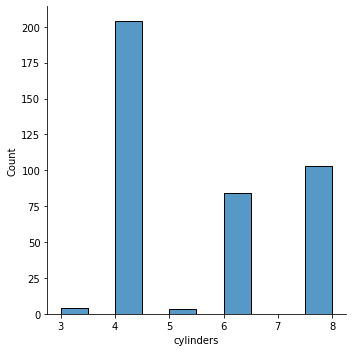

In [219]:
sns.displot(df['cylinders'])

The dataset majorly consists of vars having 4,6 or 8 cylinders

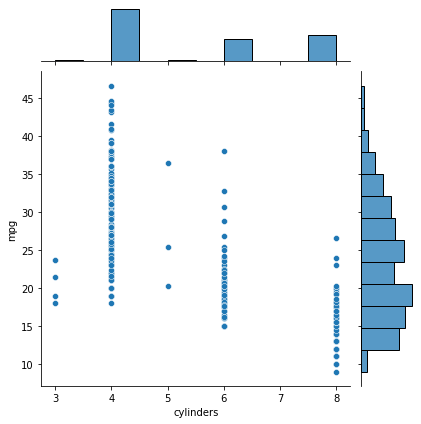

In [220]:
sns.jointplot(data=df,x='cylinders',y='mpg')

From this we can notice that even number of cynlinders might affect mpg 

### Splitting Data into Train and Test and Model Selection/Training

In [289]:
X = df.drop(['mpg','origin_europe'], axis=1)
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [290]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Printing the coefficients for each variable and the intercept

for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[0][idx]}")

The coefficient for cylinders is -0.3110243383377075
The coefficient for displacement is 0.02468199702176229
The coefficient for horsepower is -0.021889583985445993
The coefficient for weight is -0.006717667751664862
The coefficient for acceleration is 0.19083471034988045
The coefficient for model year is 0.7617325807449357
The coefficient for origin_america is -2.5661017267124513
The coefficient for origin_asia is 0.36951160114865256


In [291]:
intercept = regression_model.intercept_[0]
print(f"The intercept for model is {regression_model.intercept_}")

The intercept for model is [-16.82493968]


In [292]:
print("The score for the model is",regression_model.score(X_test,y_test))

The score for the model is 0.8226939742691548


In [293]:
predictions = regression_model.predict(X_test)

### Model Evaluation

In [294]:
# Model Evaluation
rmse = metrics.mean_squared_error(y_test, predictions) ** (0.5)
print('Root Mean Square Error is',rmse)

Root Mean Square Error is 3.3660345879714733


Thus a regression score of about 0.82 i.e 82% accuracy was achieved with 3.3 root mean square error 

Conclusion - 1. I understood how to preprocess Dataset and handle missing values and cetgorical columns as well as EDA.
2. I learnt how to train model and its evaluation as well as its tuning to improve performance. 